Question: `How to plot Date values` 

Student: Yue Yang

Possible Solution: convert Date from object to datetime

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# train.csv is the data set
train = pd.read_csv('train.csv')

In [3]:
train.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

In [4]:
# First: check out the data types of each column
train.dtypes 
# Date is not in the correct data type

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [5]:
# Use to_datetime() to transform Date in the correct data type
train['Date'] = pd.to_datetime(train.Date)
train.dtypes

Id                         int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

In [6]:
# Set Date as the DF's index
train_daily = train.set_index('Date')
train_daily.head(5)

Id Province_State Country_Region  ConfirmedCases  Fatalities
Date                                                                    
2020-01-22   1            NaN    Afghanistan             0.0         0.0
2020-01-23   2            NaN    Afghanistan             0.0         0.0
2020-01-24   3            NaN    Afghanistan             0.0         0.0
2020-01-25   4            NaN    Afghanistan             0.0         0.0
2020-01-26   5            NaN    Afghanistan             0.0         0.0

In [7]:
# Replace NaN with None in the Province_State
train_daily.Province_State.fillna('None', inplace=True)
train_daily.head()

Id Province_State Country_Region  ConfirmedCases  Fatalities
Date                                                                    
2020-01-22   1           None    Afghanistan             0.0         0.0
2020-01-23   2           None    Afghanistan             0.0         0.0
2020-01-24   3           None    Afghanistan             0.0         0.0
2020-01-25   4           None    Afghanistan             0.0         0.0
2020-01-26   5           None    Afghanistan             0.0         0.0

In [8]:
# Sum all the Fatalities grouping by the Date
fatalities_total_date = train_daily.groupby(['Date']).agg({'Fatalities':[sum]})
# Use ravel() to keep the original column name
fatalities_total_date.columns = ["_".join(x) for x in fatalities_total_date.columns.ravel()]
fatalities_total_date

Fatalities_sum
Date                      
2020-01-22            17.0
2020-01-23            18.0
2020-01-24            26.0
2020-01-25            42.0
2020-01-26            56.0
2020-01-27            82.0
2020-01-28           131.0
2020-01-29           133.0
2020-01-30           171.0
2020-01-31           213.0
2020-02-01           259.0
2020-02-02           362.0
2020-02-03           426.0
2020-02-04           492.0
2020-02-05           564.0
2020-02-06           634.0
2020-02-07           719.0
2020-02-08           806.0
2020-02-09           906.0
2020-02-10          1013.0
2020-02-11          1113.0
2020-02-12          1118.0
2020-02-13          1371.0
2020-02-14          1523.0
2020-02-15          1666.0
2020-02-16          1770.0
2020-02-17          1868.0
2020-02-18          2007.0
2020-02-19          2122.0
2020-02-20          2247.0
...                    ...
2020-04-02         53817.0
2020-04-03         59648.0
2020-04-04         65528.0
2020-04-05         70315.0
2020-04-06         75651.0
2020-04-07         83187.0
2020-04-08         89773.0
2020-04-09         97099.0
2020-04-10        104360.0
2020-04-11        110260.0
2020-04-12        115783.0
2020-04-13        121216.0
2020-04-14        128005.0
2020-04-15        136246.0
2020-04-16        146032.0
2020-04-17        156163.0
2020-04-18        162122.0
2020-04-19        167486.0
2020-04-20        172530.0
2020-04-21        179592.0
2020-04-22        186121.0
2020-04-23        193891.0
2020-04-24        200449.0
2020-04-25        206181.0
2020-04-26        209894.0
2020-04-27        214478.0
2020-04-28        220793.0
2020-04-29        227659.0
2020-04-30        233349.0
2020-05-01        238611.0

[101 rows x 1 columns]

In [9]:
len(fatalities_total_date)

101

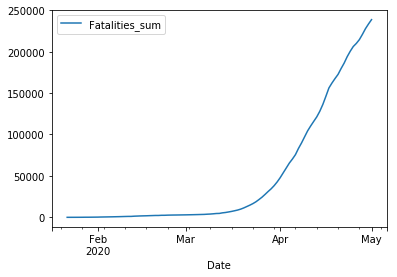

In [10]:
fatalities_total_date.plot()

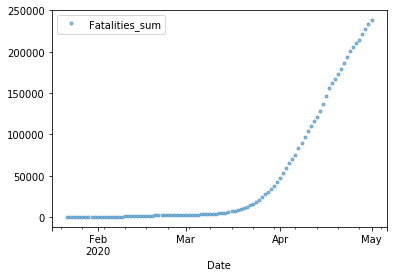

In [11]:
fatalities_total_date.plot(marker='.', 
                           alpha=0.5, 
                           linestyle= 'None')

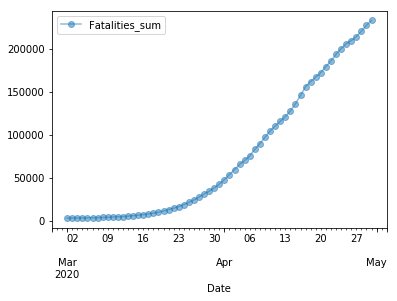

In [12]:
fatalities_total_date.loc['2020-03':'2020-04'].plot(marker='o', 
                                                         alpha=0.5, 
                                                         linestyle= '-')